In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [2]:
NFFT = 2**16
f0 = 8424.5e6
t0 = np.datetime64('2024-10-14T17:33:24.1341120564778646', 'ns')
fs = 6.144e6
n_int = 938
x = np.fromfile('/mnt/local_data/destevez/Europa_Clipper/waterfall/Europa Clipper_2024-10-14T17:33:12.703277_0x',
                'float32').reshape(-1, NFFT)

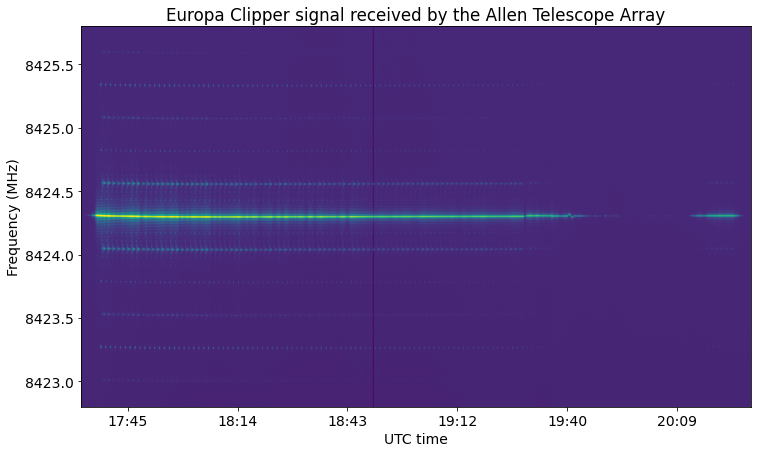

In [3]:
plt.figure(figsize=(12, 7))
a = mdates.date2num(t0)
b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=15, vmax=50)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
plt.title('Europa Clipper signal received by the Allen Telescope Array')
fc = 8424.3
plt.ylim(fc-1.5, fc+1.5);

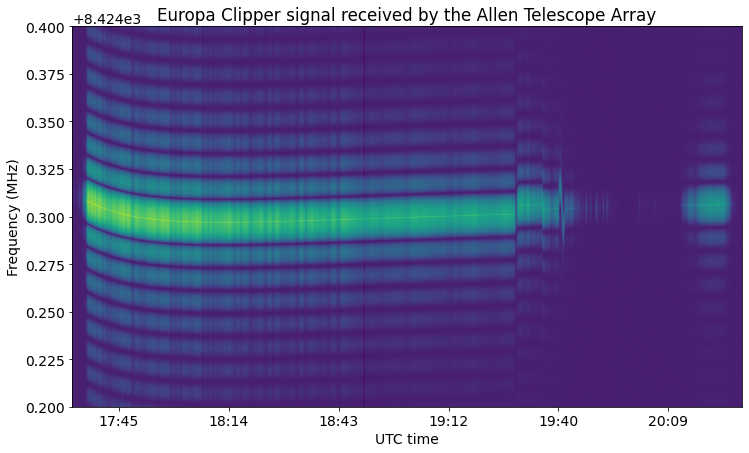

In [4]:
plt.figure(figsize=(12, 7))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=15, vmax=60)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
plt.title('Europa Clipper signal received by the Allen Telescope Array');
plt.ylim(fc-100e-3, fc+100e-3);

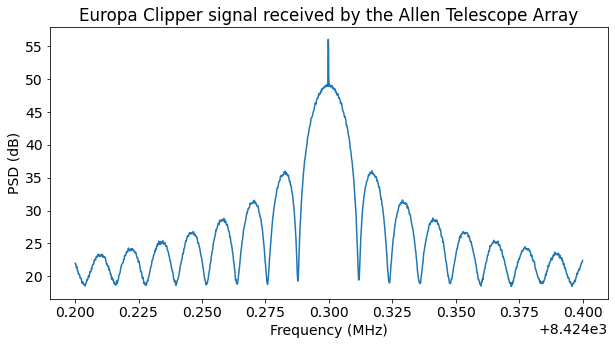

In [5]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
fsel = np.abs(fc - faxis) < 0.1;
plt.plot(faxis[fsel], 10*np.log10(x[100, fsel]))
plt.title('Europa Clipper signal received by the Allen Telescope Array')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');

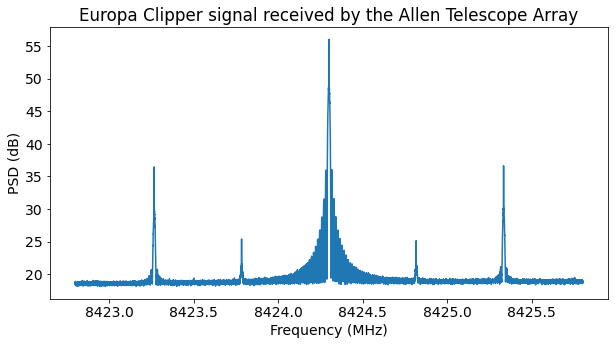

In [6]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
fsel = np.abs(fc - faxis) < 1.5;
plt.plot(faxis[fsel], 10*np.log10(x[100, fsel]))
plt.title('Europa Clipper signal received by the Allen Telescope Array')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');